Saving COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State.csv to COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State.csv
-------------------------suspended comparison---------------------------------


<ipython-input-1-bf9b1cef2ed1>:54: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_comparison_bt_confirmed_and_suspended['comparison_previous_day_admission_adult_covid_between_suspected_and_confirmed'])


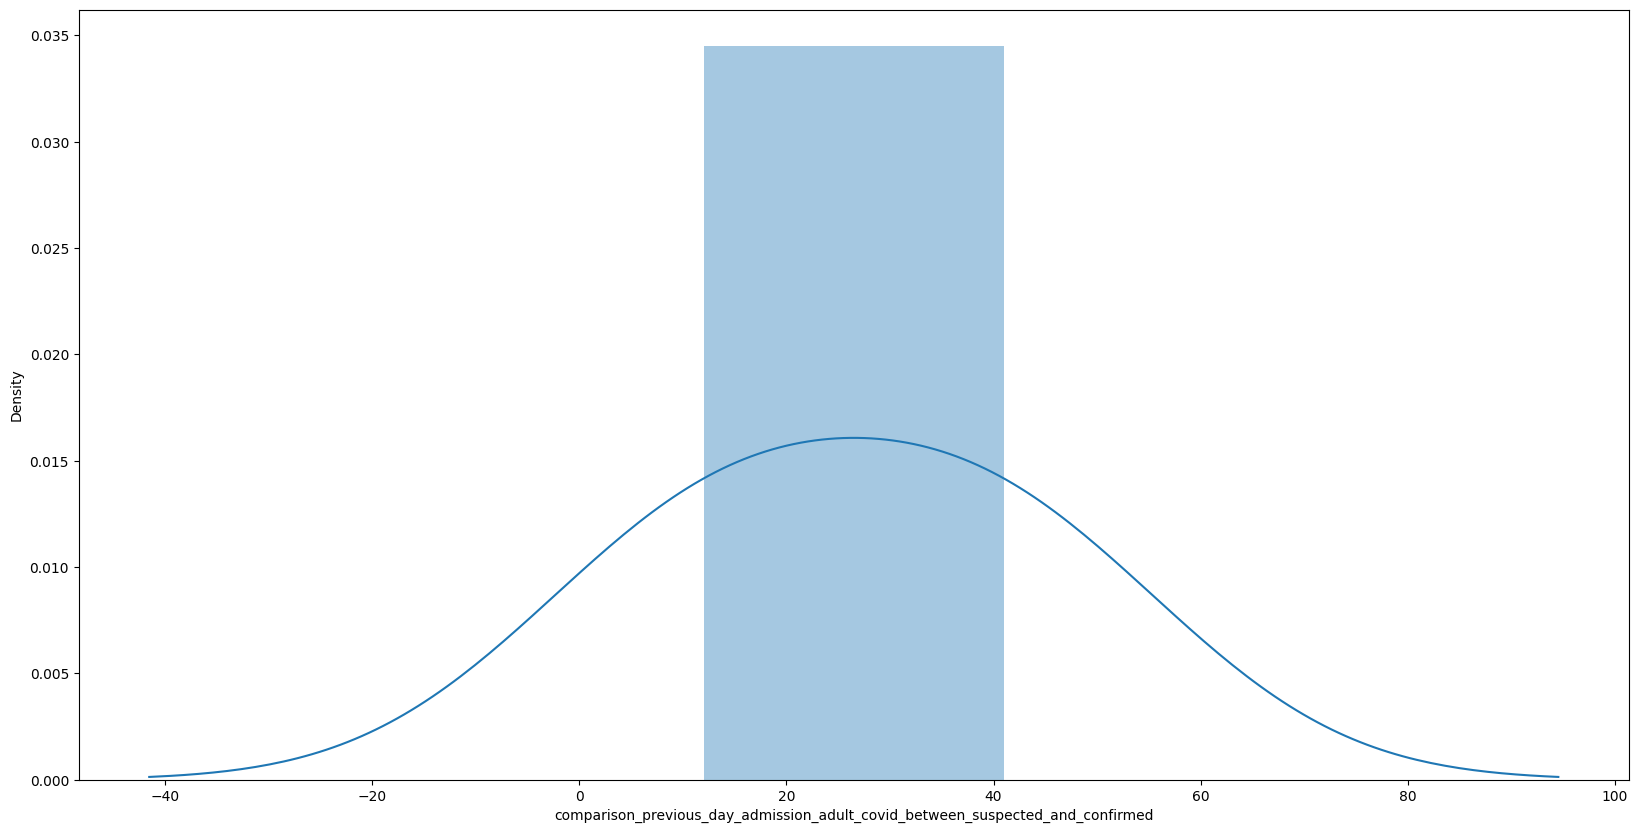

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns
import matplotlib;
import io;
from google.colab import files;
import matplotlib.ticker as mtick
uploaded = files.upload()
matplotlib.rcParams["figure.figsize"] = (20,10)
df1 = pd.read_csv(io.StringIO(uploaded["COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State.csv"].decode('ISO-8859-1')))

#<!--------------------------confirmed comparison-------------------------------->
df2_confirmed_min_max = pd.DataFrame(df1  [[
    'previous_day_admission_adult_covid_confirmed_60-69',
    'previous_day_admission_adult_covid_confirmed_70-79',
    'previous_day_admission_adult_covid_confirmed_80+',
    ]])

df2_confirmed_min_max['comparison_previous_day_admission_adult_covid_confirmed_60_80'] = np.where(

     (df2_confirmed_min_max['previous_day_admission_adult_covid_confirmed_60-69'] <= df2_confirmed_min_max['previous_day_admission_adult_covid_confirmed_70-79']) &
     (df2_confirmed_min_max['previous_day_admission_adult_covid_confirmed_60-69'] <= df2_confirmed_min_max['previous_day_admission_adult_covid_confirmed_80+'])
    , df2_confirmed_min_max['previous_day_admission_adult_covid_confirmed_60-69'], np.nan)

df2_confirmed_min_max
print('-------------------------suspended comparison---------------------------------')

#<!--------------------------suspended conparison----------------------------------------------->
df2_suspended_min_max = pd.DataFrame(df1
  [[
    'previous_day_admission_adult_covid_suspected_60_69',
    'previous_day_admission_adult_covid_suspected_70-79',
    'previous_day_admission_adult_covid_suspected_80',

    ]])
df2_suspended_min_max['comparison_previous_day_admission_adult_covid_suspected_60_80'] = np.where(
     (df2_suspended_min_max['previous_day_admission_adult_covid_suspected_60_69'] <= df2_suspended_min_max['previous_day_admission_adult_covid_suspected_70-79']) &
     (df2_suspended_min_max['previous_day_admission_adult_covid_suspected_60_69'] <= df2_suspended_min_max['previous_day_admission_adult_covid_suspected_80'])
    , df2_suspended_min_max['previous_day_admission_adult_covid_suspected_60_69'], np.nan)

# printing the dataframe
df2_suspended_min_max
#print('--------------------------\n\ncomparison between suspended and confirmed--------------------------------')
df2_comparison_bt_confirmed_and_suspended = pd.DataFrame([
        df2_suspended_min_max['comparison_previous_day_admission_adult_covid_suspected_60_80'],
        df2_confirmed_min_max['comparison_previous_day_admission_adult_covid_confirmed_60_80']
])
df2_comparison_bt_confirmed_and_suspended['comparison_previous_day_admission_adult_covid_between_suspected_and_confirmed'] =  df2_comparison_bt_confirmed_and_suspended.iloc[:, -4:-1].sum(axis=1)
# df2_comparison_bt_confirmed_and_suspended = df2_comparison_bt_confirmed_and_suspended['comparison_previous_day_admission_adult_covid_between_suspected_and_confirmed'].dropna(how='all')

# printing the dataframe
df2_comparison_bt_confirmed_and_suspended
sns.distplot(df2_comparison_bt_confirmed_and_suspended['comparison_previous_day_admission_adult_covid_between_suspected_and_confirmed'])
         
plt.show()
# printing the dataframe
